# Gaussian Mixture Models

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
df = pd.read_csv('df_processed.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Month,DayofWeek,Is_Weekend,Season,PM2.5_to_PM10_Ratio
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,Moderate,1,3,0,Winter,0.50763
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,Moderate,1,4,0,Winter,0.50763
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,Moderate,1,5,1,Winter,0.50763
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,Moderate,1,6,1,Winter,0.50763
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,Moderate,1,0,0,Winter,0.50763


In [12]:
# Select the features for clustering
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
X = df[features]
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02
1,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50
2,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40
3,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14
4,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89


In [13]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [15]:
from sklearn.mixture import GaussianMixture

In [16]:
# Perform Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

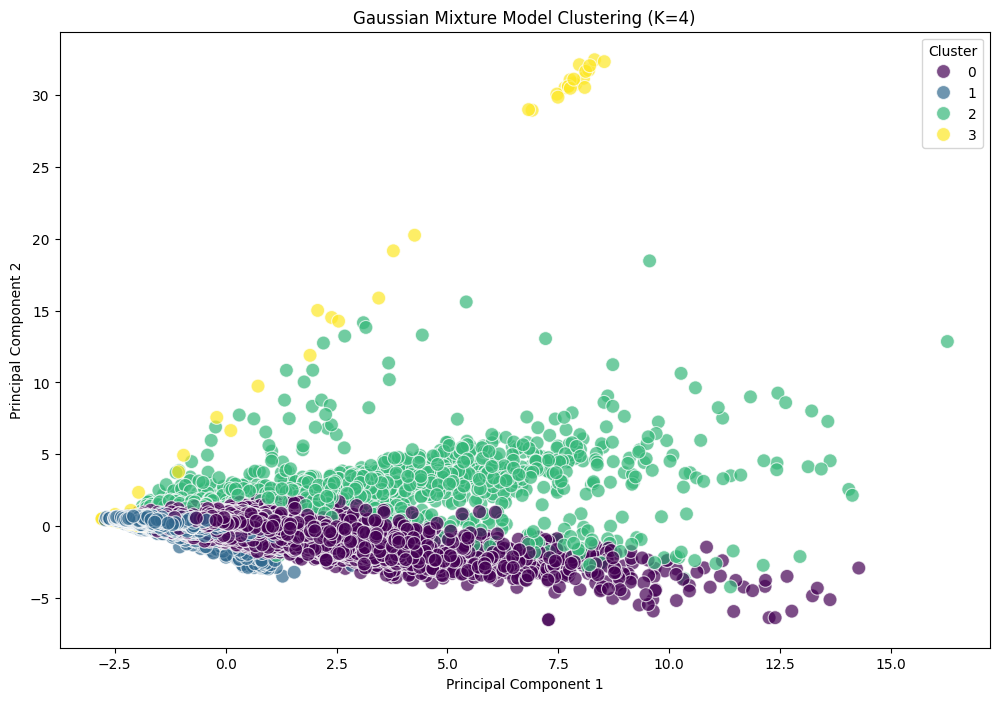

In [17]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_labels, palette='viridis', s=100, alpha=0.7)
plt.title('Gaussian Mixture Model Clustering (K=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [19]:
df['Cluster'] = gmm.fit_predict(X_scaled)


cluster_analysis = df.groupby('Cluster')[features].mean()

print("GMM: Mean Pollutant Values for Each Cluster")
print(cluster_analysis)


GMM: Mean Pollutant Values for Each Cluster
             PM2.5        PM10         NO        NO2        NOx        NH3  \
Cluster                                                                      
0        94.274220  144.081874  27.145695  35.775560  44.965281  21.183871   
1        42.126705   84.350575   8.420269  19.339501  19.309659  20.698355   
2        73.699040  119.357499  21.684442  43.672314  43.060377  21.365623   
3        22.917671   33.052237   0.928539   2.777032   1.190548   3.047671   

                CO        SO2         O3    Benzene    Toluene  
Cluster                                                         
0         1.202102  15.869300  36.746617   2.577188   8.399018  
1         0.784587   8.154387  31.985484   0.831797   2.492051  
2        13.204273  36.840832  34.713313  11.174556  23.999188  
3         0.268767   6.742740  27.549361  49.884658  48.197443  


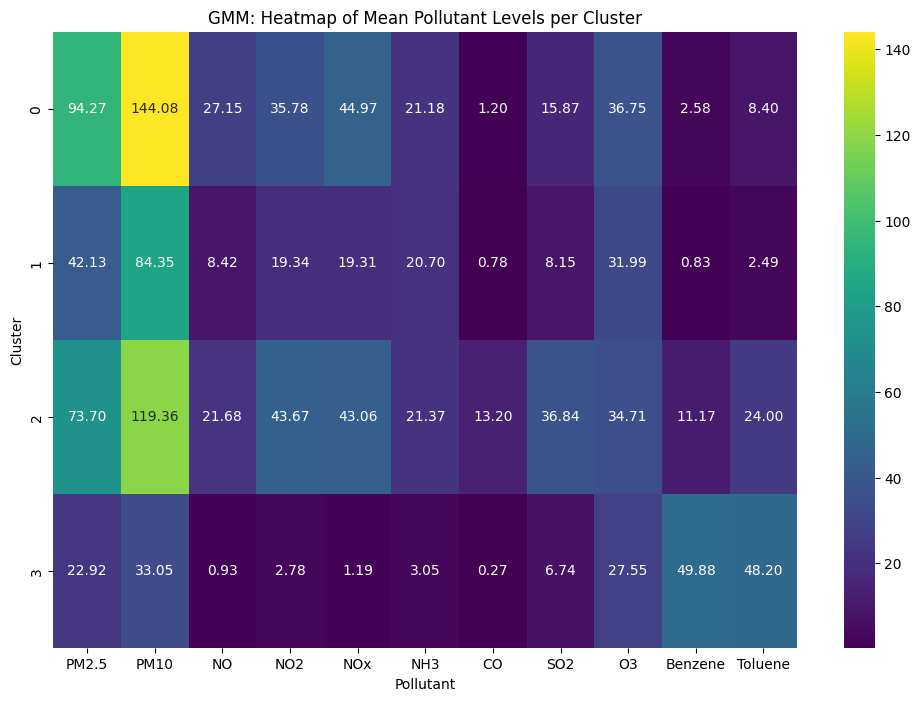

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_analysis, annot=True, cmap='viridis', fmt='.2f')
plt.title('GMM: Heatmap of Mean Pollutant Levels per Cluster')
plt.ylabel('Cluster')
plt.xlabel('Pollutant')
plt.show()

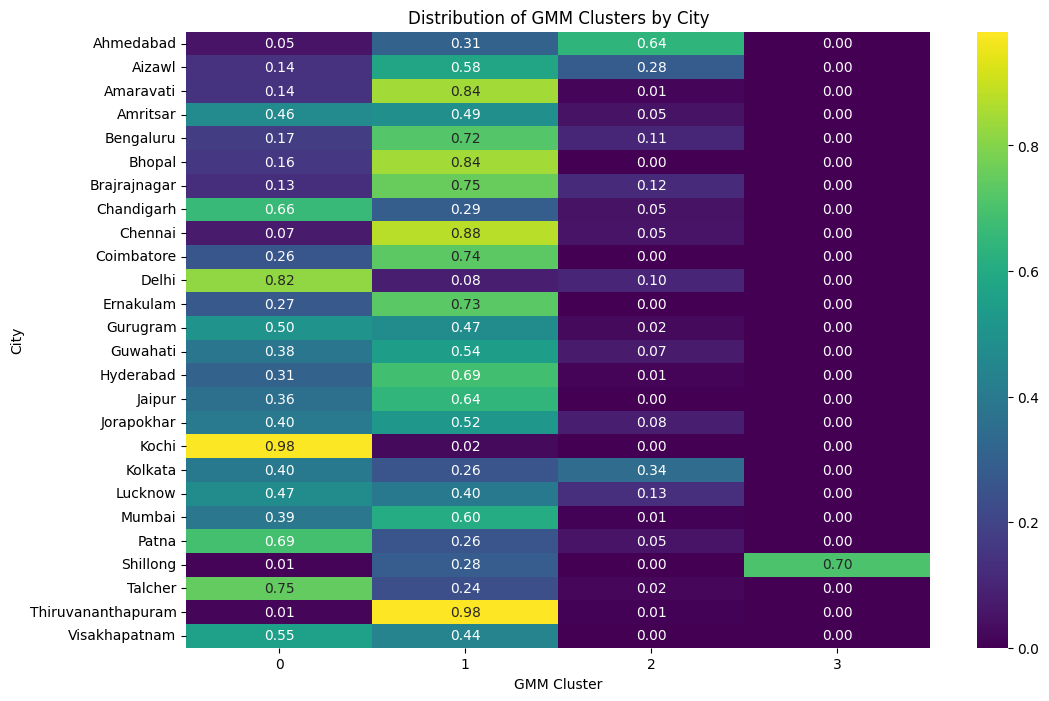

In [21]:
city_cluster_distribution_gmm = df.groupby('City')['Cluster'].value_counts(normalize=True).unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(city_cluster_distribution_gmm, annot=True, cmap='viridis', fmt='.2f') # Use fmt='.2f' for percentages
plt.title('Distribution of GMM Clusters by City')
plt.ylabel('City')
plt.xlabel('GMM Cluster')
plt.show()